# League of Legends Classification
**Author**: Eric Wehmueller
***

## Overview

This project is the third project for Flatiron School's bootcamp program in Data Science.  We are being placed into a hypothetical situation as a Data Scientist and hoping to provide value to our business for the scenario we are given.

## Business Problem

I have been hired by the esports organization Cloud9 as a player coach/analyst for the professional League of Legends team.  They are competing at the top level and are looking to win every game they possibly can, as there is a lot of money on the line.  My job is to help them determine the most important factors in winning League of Legends games.  I am to investigate what should I be advising our players to focus on in the first 10-15 minutes of each game to provide the highest chance to win the game.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from xgboost import XGBClassifier

## Data Investigation and Cleaning

In [2]:
file1 = "data\high_diamond_ranked_10min.csv"
file2 = "data\Challenger_Ranked_Games_10minute.csv"
df = pd.read_csv(file1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [5]:
for colName in df.columns:
    print(f'-{colName}- Value Counts')
    print(df[colName].value_counts())
    print();

-gameId- Value Counts
4458383359    1
4492870986    1
4447992971    1
4517889362    1
4524077612    1
             ..
4526469771    1
4511142535    1
4503476670    1
4516498052    1
4473786370    1
Name: gameId, Length: 9879, dtype: int64

-blueWins- Value Counts
0    4949
1    4930
Name: blueWins, dtype: int64

-blueWardsPlaced- Value Counts
16     1255
15     1217
17      988
14      974
18      831
       ... 
130       1
198       1
7         1
209       1
183       1
Name: blueWardsPlaced, Length: 147, dtype: int64

-blueWardsDestroyed- Value Counts
2     2357
3     2116
1     1790
4     1413
5      746
0      745
6      345
7      163
8       68
9       22
13      14
10      12
15      12
11      12
18      11
17      10
19       9
12       8
16       8
14       7
20       3
21       2
22       2
27       1
25       1
24       1
23       1
Name: blueWardsDestroyed, dtype: int64

-blueFirstBlood- Value Counts
1    4987
0    4892
Name: blueFirstBlood, dtype: int64

-blueKills- Valu

Notes on data exploration:



***
-----Challenger Dataset-----

There are some multiple gameIDs, we are going to want to filter out duplicates.

Inclusion of Dragon TYPE data is nice. We should make binary columns for Air,Earth,Water,Fire for each side (Red/Blue)

Filter out elder dragon data/game, this should not be possible by 10 minutes and is likely a bug.

Engineer a gold diff column (Positive for blue, negative for red)

First blood columns for each team is always zero. This means the first blood data is not in this dataset. This is really unfortunate because I believe (from my own personal experience) that having this data
is actually really important if we are talking about action in the first 10 minutes of a game.

***
-----Diamond+ Dataset-----

No duplicate gameIDs, no missing values.

This dataset is much more ready to use for modeling and classification purposes, although it is a smaller dataset (10k vs 26k entries)

I'm going to continue working with this dataset from here on out, circling back to the challenger dataset if I have time.
***


With 4949 Red side wins and 4930 blue side wins, this is a fairly balanced dataset.

There is no categorical data, so no values need to be directly changed before modeling.


In [6]:
#Todo: Visualization of Gold Diff vs Win?

## Visualizations

Let's take an initial look at which features correlate the most to game outcome directly.

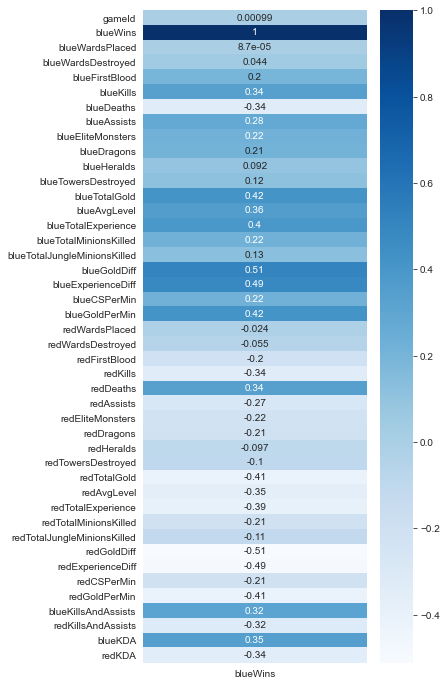

In [149]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(5, 12))
sns.heatmap(df.corr()[['blueWins']], annot=True, cmap="Blues");

<Figure size 1440x1440 with 0 Axes>

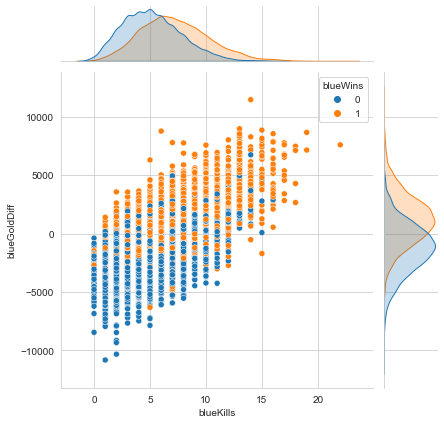

In [8]:
fig = plt.figure(figsize=(20, 20))
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins');

## Feature Engineering
I'm going to quickly feature engineer a stat metric often used in the professional scene: KDA ( Kills+Assists / Deaths ) for both Blue and Red side.

In [9]:
df['blueKillsAndAssists'] = df['blueKills'] + df['blueAssists']
df['redKillsAndAssists'] = df['redKills'] + df['redAssists']

In [10]:
def calc_KDA(data, isBlue=True):
    prefix = 'blue'
    if not isBlue:
        prefix = 'red'
    #checking for np.inf division by zero, replace these with zeros
    df[prefix+'KDA'] = round((df[prefix+'KillsAndAssists']/df[prefix+'Deaths']),2).replace(np.inf, 0)                      

In [11]:
calc_KDA(df, isBlue=True)
calc_KDA(df, isBlue=False)

In [12]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueKillsAndAssists,redKillsAndAssists,blueKDA,redKDA
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7,20,14,3.33,1.56
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,10,7,2.00,1.40
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,11,25,1.00,3.57
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8,9,15,1.80,3.75
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,12,13,2.00,2.17
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1,11,5,3.67,1.00
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3,14,15,2.33,2.14
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0,8,24,0.62,4.80
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0,15,12,2.14,1.71
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5,9,9,1.80,2.25


# Modeling

## Gaussian Naive-Bayes

To start, I'm going to make a Gaussian Naive-Bayes Model. This model assumes that features are independent of one another, so I will be dropping some features to meet this assumption.  

In [13]:
df_no_red_kills = df[df['redKills'] == 0]
df_zero_kills = df_no_red_kills[df_no_red_kills['blueKills'] == 0]

df_zero_kills.shape

(0, 44)

There are no games where neither team has a kill at 10 minutes in this dataset. We can assume that if one team does not take first blood, the other team must have taken first blood.  Hence, we can remove the 'redFirstBlood' feature. The other features I'm removing below are the inverse of the corresponding blue feature.

In [14]:
#several of these columns are just diving by 10 to get "per minute" stats
#some are redundant, removing them for modelling to reduce multicollinearity
model_df = df.drop(['gameId', 
             'blueGoldPerMin', 'redGoldPerMin',
             'blueCSPerMin', 'redCSPerMin',
             'redGoldDiff', 'redExperienceDiff',
             'redTotalGold', 'redTotalExperience',
             'redKills', 'redDeaths',
            'redFirstBlood'], axis=1)

In [15]:
model_df.head(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,blueKillsAndAssists,redKillsAndAssists,blueKDA,redKDA
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,0,0,6.8,197,55,20,14,3.33,1.56
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,1,1,6.8,240,52,10,7,2.00,1.40
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,0,0,6.8,203,28,11,25,1.00,3.57
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,10,0,0,0,0,7.0,235,47,9,15,1.80,3.75
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,7,1,1,0,0,7.0,225,67,12,13,2.00,2.17
5,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,36,5,2,0,0,0,0,7.0,221,59,11,5,3.67,1.00
6,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,57,1,9,0,0,0,0,6.4,164,35,14,15,2.33,2.14
7,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,15,0,11,1,1,0,0,6.6,157,54,8,24,0.62,4.80
8,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,15,2,5,2,1,1,0,7.2,240,53,15,12,2.14,1.71
9,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,16,2,4,0,0,0,0,6.8,247,43,9,9,1.80,2.25


In [16]:
X1= model_df.drop('blueWins', 1)
y1= model_df['blueWins']

X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7409, 31), (2470, 31), (7409,), (2470,))

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

In [19]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3718
           1       0.73      0.72      0.72      3691

    accuracy                           0.73      7409
   macro avg       0.73      0.73      0.73      7409
weighted avg       0.73      0.73      0.73      7409



I'm now looking to remove features that may be highly correlated that are still remaining. Let's check that.

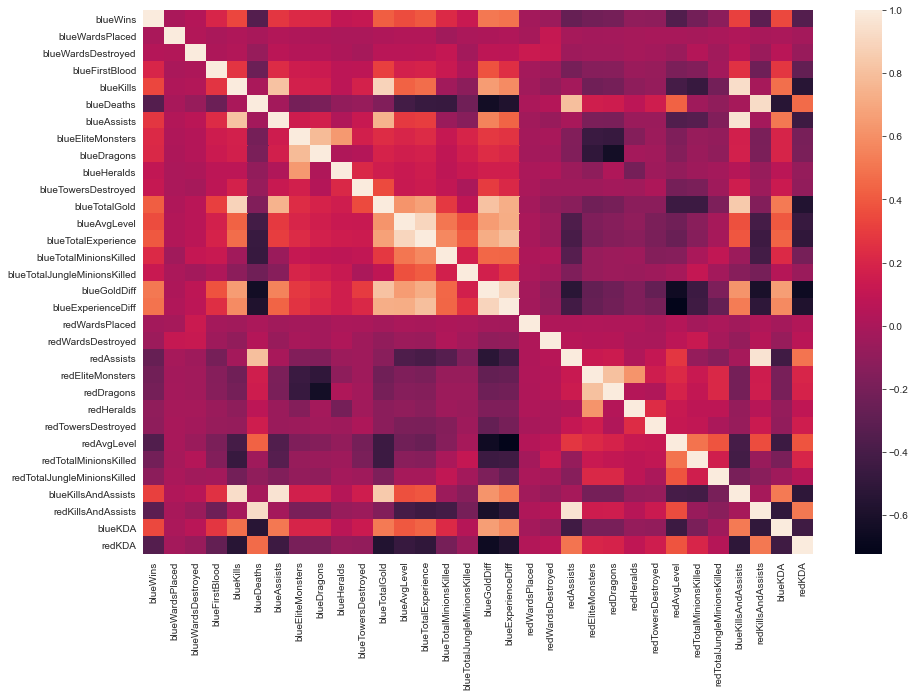

In [20]:
corr = model_df.corr()
plt.figure(figsize=(15,10))
ax= plt.subplot()
sns.heatmap(corr, ax=ax);

In this visualization, I'm looking for values that are completely white or completely black (1.00 or -1.00), meaning that these features are highly correlated.

We can remove 'redAvgLevel' since in-game level IS experience, and it correlates too heavily with 'blueExperienceDiff'. It's essentially the same thing. Same with 'blueAvgLevel' and 'blueTotalExperience', this is just a scaled-down field of the same values. 

I also realized I need to remove my blue and red Kills+Assists features, as this was just a helpful step to calculate KDA while handling division by zero.



In [21]:
model_df = model_df.drop(['redAvgLevel', 
                    'blueKillsAndAssists',
                    'redKillsAndAssists',
                    'blueAvgLevel'], axis=1)

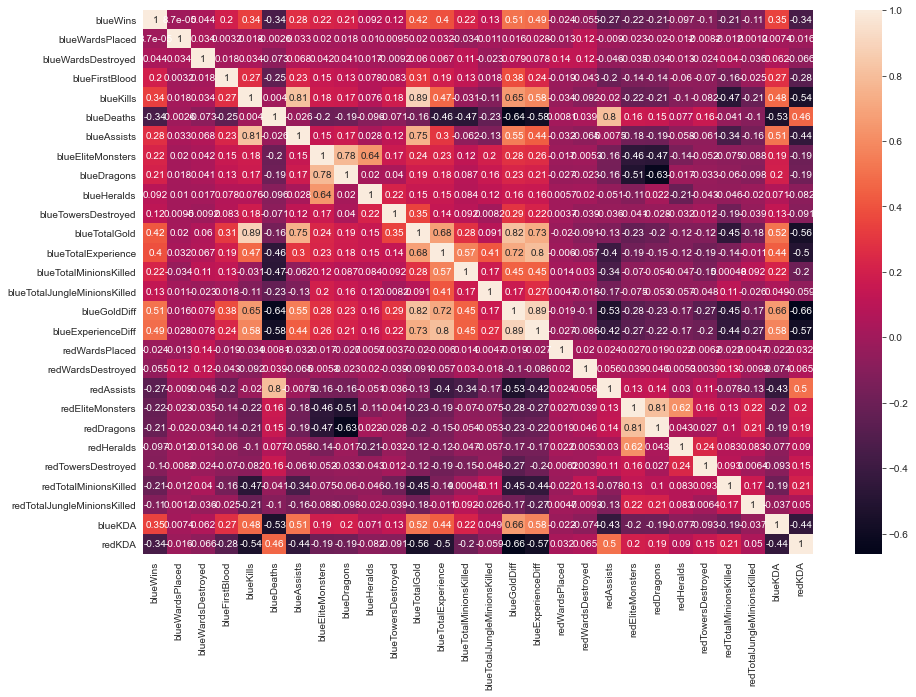

In [22]:
corr = model_df.corr()
plt.figure(figsize=(15,10))
ax= plt.subplot()
sns.heatmap(corr, ax=ax, annot=True);

## Decision Tree Classifier

In [29]:
X_dtc= model_df.drop('blueWins', 1)
y_dtc= model_df['blueWins']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_dtc,
    y_dtc)

X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((7409, 27), (2470, 27), (7409,), (2470,))

In [81]:
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y_dtc)
# y_encoded

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [82]:
# print(encoder.classes_)

[0 1]


In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(X2_train, y2_train)
scores = cross_val_score(dtc, X2_train,y2_train)
print('cross-val-scores')
print(scores)
print('mean')
print(round(scores.mean(), 4))

cross-val-scores
[0.62887989 0.62415655 0.63697706 0.63967611 0.63673194]
mean
0.6333


In [31]:
pred = dtc.predict(X2_test)
print(classification_report(y2_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1238
           1       0.64      0.62      0.63      1232

    accuracy                           0.63      2470
   macro avg       0.63      0.63      0.63      2470
weighted avg       0.63      0.63      0.63      2470



In [84]:
# # Graphviz workflow.
# dot_data = export_graphviz(
#     decision_tree=dtc,
#     feature_names=X_dtc.columns,
#     class_names=encoder.classes_,
#     filled=True, 
#     rounded=True,
#     proportion=True,
#     )

# graph = graph_from_dot_data(dot_data)

# Image(graph.create_png())

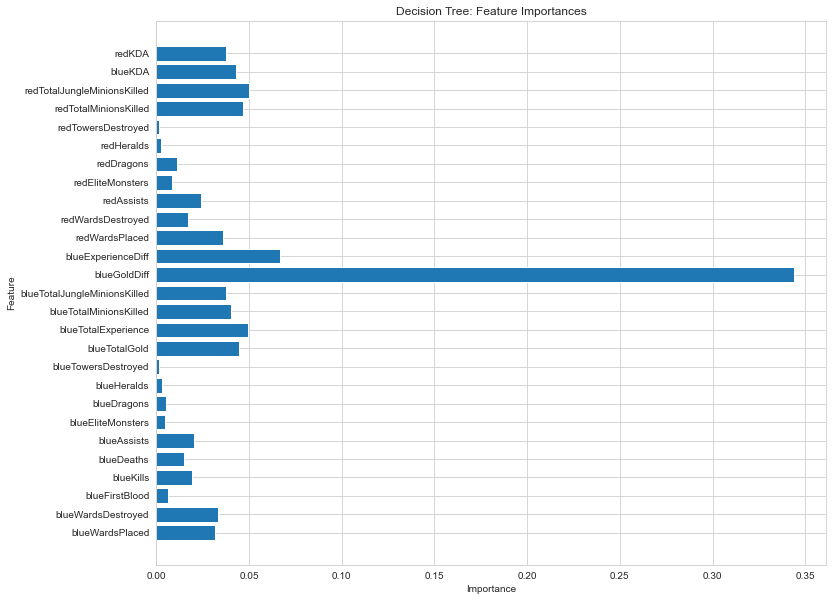

In [94]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
plt.barh(X_dtc.columns, dtc.feature_importances_)
ax.set(
    title="Decision Tree: Feature Importances",
    ylabel="Feature",
    xlabel="Importance"
);

As you can see, our model has a clear winner here- 'blueGoldDiff'.  No wonder they show the current gold value for both teams at all times on professional game broadcasts.  This model agrees; this is a pretty great indicator for which team is winning. However, it doesn't give us that much insight into the game.  Everything you do gives you gold, so how do you create a gold difference? We have to look at the other features.

<AxesSubplot:title={'center':'Decision Tree: Feature Importances'}, ylabel='Feature'>

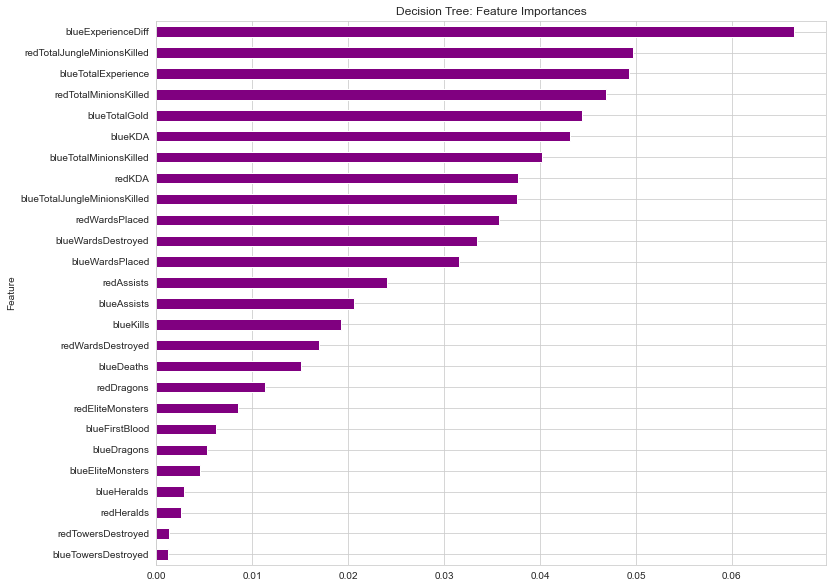

In [144]:
sorted_series = pd.Series(dtc.feature_importances_,index=X_dtc.columns).sort_values()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
sorted_series.iloc[:-1].plot(kind='barh', 
                    color='purple',
                    title="Decision Tree: Feature Importances",
                    xlabel='Feature',
                    ylabel='Importance')

This model favors the Experience difference the most for predicting an end-game result, followed by how many Jungle and Regular minions are killed by red team.  

It is worth noting that our model honestly could care less if your team is taking towers and Heralds early on in the game. These are the least impactful by far.

To Summarize:
***
Top Features:

* Gold Differential (the obvious answer)
* Experience Differential
* Jungle/Regular Minion total
* KDA

***

Bottom Features:

* Towers (least impactful)
* Heralds
* Elite Monsters/Dragons

***

Let's be more picky with our correlation heatmap and remove several more features before our third classification model. While interpreting these results, I realized that the only "Elite Monsters" on the map before 10 minutes are dragons, and only 1 will be able to spawn. Dragons spawn every 5 minutes starting at 5 minutes into the game. Therefore, the Elite Monsters features are essentially useless- providing the same level of information as the dragons column.

I'm also removing "Total Experience", as it correlates heavily with Exp Differential. We only need one of these. I'm also going to remove the "Total Gold" for the same reasoning.


In [145]:
model_df = model_df.drop(['redEliteMonsters',
                          'blueEliteMonsters',
                          'blueTotalExperience',
                           'blueTotalGold'], axis=1)

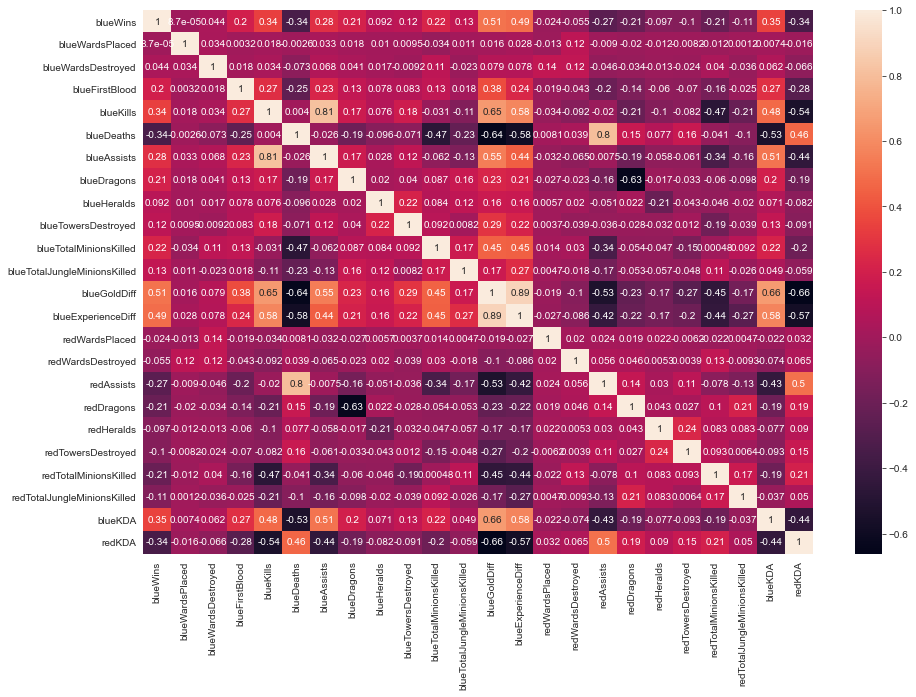

In [146]:
corr = model_df.corr()
plt.figure(figsize=(15,10))
ax= plt.subplot()
sns.heatmap(corr, ax=ax, annot=True);

Looking much better than before. No values here greater than 0.81 or less than -0.66 on our correlation heatmap aside from Experience and Gold. However, I would like the keep the two for interpretable results and being able to compare the two in our final model.

## XGB Classifier

I've been hearing a lot of things about how powerful XGB is and I'd really like to put it to use here as a final model for this project.

In [148]:
model_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled,blueKDA,redKDA
0,0,28,2,1,9,6,11,0,0,0,195,36,643,-8,15,6,8,0,0,0,197,55,3.33,1.56
1,0,12,1,0,5,5,5,0,0,0,174,43,-2908,-1173,12,1,2,1,1,1,240,52,2.00,1.40
2,0,15,0,0,7,11,4,1,0,0,186,46,-1172,-1033,15,3,14,0,0,0,203,28,1.00,3.57
3,0,43,1,0,4,5,5,0,1,0,201,55,-1321,-7,15,2,10,0,0,0,235,47,1.80,3.75
4,0,75,4,0,6,6,6,0,0,0,210,57,-1004,230,17,2,7,1,0,0,225,67,2.00,2.17


In [156]:
X_xgb= model_df.drop('blueWins', 1)
y_xgb= model_df['blueWins']

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_xgb,
    y_xgb)

X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((7409, 23), (2470, 23), (7409,), (2470,))

In [166]:
model_xgb = XGBClassifier()
model_xgb.fit(X3_train, y3_train)
scores = cross_val_score(model_xgb, X3_train,y3_train)
print('cross-val-scores')
print(scores)
print('mean')
print(round(scores.mean(), 5))

cross-val-scores
[0.70782726 0.68151147 0.70512821 0.72537112 0.7049291 ]
mean
0.70495


In [168]:
pred_xgb = model_xgb.predict(X3_test)
print(classification_report(y3_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1242
           1       0.70      0.69      0.70      1228

    accuracy                           0.70      2470
   macro avg       0.70      0.70      0.70      2470
weighted avg       0.70      0.70      0.70      2470



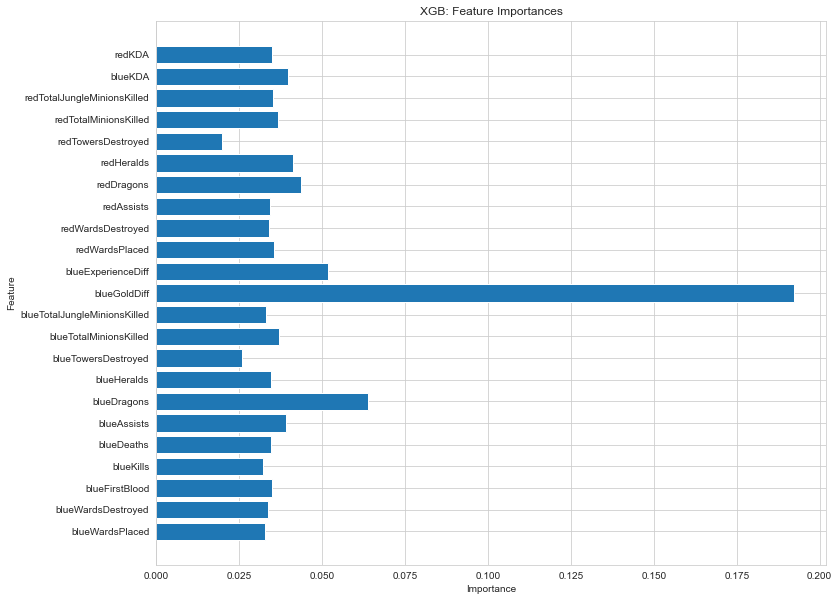

In [159]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
plt.barh(X_xgb.columns, model_xgb.feature_importances_)
ax.set(
    title="XGB: Feature Importances",
    ylabel="Feature",
    xlabel="Importance"
);

<AxesSubplot:title={'center':'XGB: Feature Importances'}, ylabel='Feature'>

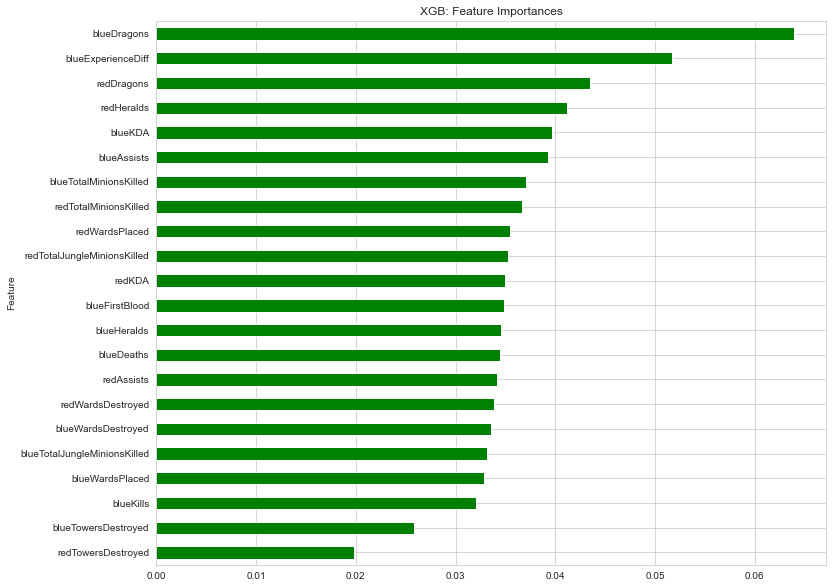

In [169]:
sorted_series_xgb = pd.Series(model_xgb.feature_importances_,index=X_xgb.columns).sort_values()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
sorted_series_xgb.iloc[:-1].plot(kind='barh', 
                    color='green',
                    title="XGB: Feature Importances",
                    xlabel='Feature',
                    ylabel='Importance')

We have mostly similar results from our XGB classification as well. With a 70.5% accuracy we are able to predict the outcome of a game based on these 23 (mostly) independent features.

It is worth noting that our priorities have changed on this model compared to the Decision Tree classification model. 

Ignoring the obvious Gold Difference feature, we have a very different leader for feature importance- **dragons**

Our model thinks that securing dragons is the most impactful early things your team can take before 10 minutes.  To summarize:
***
Top Features:

* Gold Differential (the obvious answer)
* Dragons
* Experience

***

Bottom Features:

* Towers (least impactful yet again)
* Kills (very surprising actually)
* Blue side vision control (wards placed/destroyed)

***


